In [62]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
(x_train_raw, y_train), (x_test_raw, y_test) = tf.keras.datasets.mnist.load_data()

In [64]:
x_train = x_train_raw / 255.0
x_test = x_test_raw / 255.0

In [65]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [66]:
model.compile(
    optimizer="sgd",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [67]:
model.fit(x_train, y_train, epochs=100, batch_size=128)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5217 - loss: 1.6215
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8476 - loss: 0.6181
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8747 - loss: 0.4741
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8848 - loss: 0.4235
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8954 - loss: 0.3797
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8982 - loss: 0.3655
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9017 - loss: 0.3516
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9035 - loss: 0.3462
Epoch 9/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9073 - loss: 0.3325
Epoch 10/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9091 - loss: 0.3279
Epoch 11/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9105 - loss: 0.3214
Epoch 12/100
469/469 ━━━━━━━━━━━━━━━━━━━━

In [68]:
def make_prediction(index):
    
    image = np.expand_dims(x_test[index], axis=0)
    prediction = model.predict(image)
    print("Predicted class:", np.argmax(prediction))
    print("Actual:", y_test[index])
    print("Index: ", index)

    plt.imshow(x_test[index], cmap='gray')
    plt.title(f"Predicted: {np.argmax(prediction)} | Actual: {y_test[index]}")
    plt.axis('off')
    plt.show()

In [69]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9134 - loss: 0.3090


[0.26910337805747986, 0.9248999953269958]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted class: 0
Actual: 0
Index:  2081


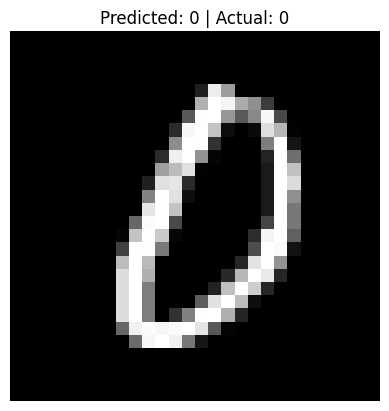

In [70]:
make_prediction(np.random.randint(0,10000))

In [71]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [72]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [73]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8610 - loss: 0.4718
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9811 - loss: 0.0611
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9850 - loss: 0.0486
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9872 - loss: 0.0417
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9878 - loss: 0.0447


In [74]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9824 - loss: 0.0818


[0.06627015024423599, 0.9855999946594238]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: 5
Actual: 3
Index:  2280


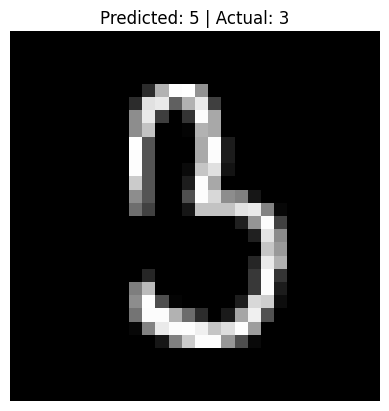

In [92]:
make_prediction(np.random.randint(0,10000))